## Prepare train_data and test_data

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from hypergbm import make_experiment
from sklearn.metrics import recall_score

07-21 16:04:10 I hypernets.u._fsutils.py 300 - use /home/wumy/tmp/workdir as working directory.


In [2]:
datasets_root_path = './../../resource/datasets/binary/Bank'
train_data = pd.read_csv('{}/train.csv'.format(datasets_root_path))
test_data = pd.read_csv('{}/test.csv'.format(datasets_root_path))
X_train = train_data.copy()
y_train = X_train.pop('deposit')
X_test = test_data.copy()
y_test = X_test.pop('deposit')

# The distribution of y

In [3]:
labels_train = y_train.value_counts()
print('The distribution of y_train\n{}\n\n'.format(labels_train))
labels_test = y_test.value_counts()
print('The distribution of y_test\n{}\n\n'.format(labels_test))

The distribution of y_train
no     31918
yes     4250
Name: deposit, dtype: int64


The distribution of y_test
no     8004
yes    1039
Name: deposit, dtype: int64




# Without class_balancing
### _best_reward is 0.4754 

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(36168, 17)","(36168,)",None,None,"(9043, 18)",binary(2)


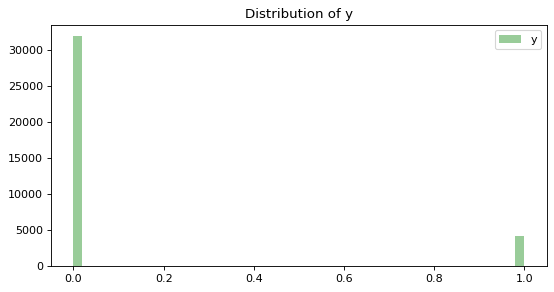

07-21 16:04:11 W hypernets.e.compete.py 1167 - X_train['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'] and X_test['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit'] have different columns before data_clean, try fix it.


## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[Unnamed: 0, age, job, marital, education, def..."
1,selected_features,"[age, job, marital, education, default, balanc..."
2,unselected_features,[Unnamed: 0]
3,X_train.shape,"(36168, 16)"
4,y_train.shape,"(36168,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,"(9043, 16)"
8,unselected_reason,{'Unnamed: 0': 'idness'}
9,kept/dropped feature count,16/1


## Drift Detection

### Initliazed parameters

,key,value
0,min_features,10
1,name,drift_detection
2,num_folds,5
3,remove_shift_variable,True
4,remove_size,0.1
5,threshold,0.7
6,variable_shift_threshold,0.7


### Fitted parameters

,key,value
0,input_features,"[age, job, marital, education, default, balanc..."
1,selected_features,None
2,unselected_features,None
3,history,"[{'auc': 0.5019675689558889, 'n_features': 16,..."
4,scores,"{'job': 0.49300104763233427, 'marital': 0.5129..."


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,max_trials,None
2,name,space_searching
3,num_folds,3
4,size,None
5,time_limit,None


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,16,0.894358,7,0.904038,73.6954,17,30


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,7,0.904038,3.256090,"[0, 2, 0, 1, 395, 1, 3, 2, 4]"
1,11,0.903761,3.666188,"[2, 2, 1, 1, 0, 2, 2]"
2,9,0.903485,3.597188,"[2, 1, 1, 1, 0, 4, 1]"
3,12,0.903208,5.384911,"[2, 3, 0, 1, 1, 4]"
4,3,0.902378,12.265699,"[2, 3, 1, 3, 3, 1, 3]"


#### Best Trial:

key,value
signature,541efd857751b207e901868fb0bc398b
vectors,"[0, 2, 0, 1, 395, 1, 3, 2, 4]"
0-estimator_options.hp_or,0
1-numeric_imputer_0.strategy,constant
2-numeric_scaler_optional_0.hp_opt,False
3-Module_LightGBMEstimator_1.boosting_type,dart
4-Module_LightGBMEstimator_1.num_leaves,395
5-Module_LightGBMEstimator_1.max_depth,5
6-Module_LightGBMEstimator_1.learning_rate,0.1
7-Module_LightGBMEstimator_1.reg_alpha,0.1


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.890511,9,0.90558,86.50436,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,9,0.905580,30.572247,"[1, 0, 0, 3, 3, 0, 0, 2, 3, 0]"
1,7,0.903727,16.398241,"[1, 2, 1, 3, 1, 1, 0, 1, 1, 4, 2]"
2,2,0.892308,8.873688,"[1, 0, 0, 3, 1, 1, 1, 1, 5, 3]"
3,10,0.890511,3.303983,"[1, 2, 0, 0, 1, 0, 2, 2, 1, 1]"
4,8,0.890400,4.431698,"[1, 2, 0, 0, 1, 1, 4, 2, 2, 0]"


#### Best Trial:

key,value
signature,efa0b027dff5f7cb032664969d49ae84
vectors,"[1, 0, 0, 3, 3, 0, 0, 2, 3, 0]"
0-estimator_options.hp_or,1
1-numeric_imputer_0.strategy,mean
2-numeric_scaler_optional_0.hp_opt,False
3-Module_XGBoostEstimator_1.max_depth,10
4-Module_XGBoostEstimator_1.learning_rate,0.1
5-Module_XGBoostEstimator_1.booster,gbtree
6-Module_XGBoostEstimator_1.gamma,0.5
7-Module_XGBoostEstimator_1.min_child_weight,10


### Fitted parameters

,key,value
0,input_features,"[age, job, marital, education, default, balanc..."
1,best_reward,0.878484
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,make_scorer(accuracy_score)


### Fitted parameters

,0,1
0,weights,"[0.4, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,scores,"[0.8784837425348374, 0.8820227825702278, 0.882..."
2,best_stack,"[0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 1, 0, 2, ..."
3,hits,"{0: 8, 1: 8, 2: 4}"
4,ensemble_size,20


In [4]:
experiment = make_experiment(train_data.copy(),test_data=test_data.copy(),target='deposit',
                             random_state=8888,max_trials=10,
                             class_balancing=None)
estimator = experiment.run()

In [5]:
y_pred = estimator.predict(X_test)
score = recall_score(y_test,y_pred,pos_label='yes')
score

0.4754571703561116

# Set class_balancing='ClassWeight'
 ###   _best_reward is 0.8816

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(36168, 17)","(36168,)",None,None,"(9043, 18)",binary(2)


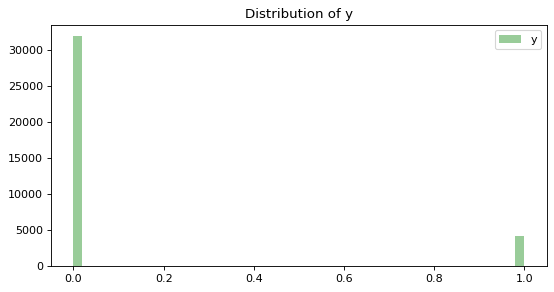

07-21 16:07:09 W hypernets.e.compete.py 1167 - X_train['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'] and X_test['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit'] have different columns before data_clean, try fix it.


## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[Unnamed: 0, age, job, marital, education, def..."
1,selected_features,"[age, job, marital, education, default, balanc..."
2,unselected_features,[Unnamed: 0]
3,X_train.shape,"(36168, 16)"
4,y_train.shape,"(36168,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,"(9043, 16)"
8,unselected_reason,{'Unnamed: 0': 'idness'}
9,kept/dropped feature count,16/1


## Drift Detection

### Initliazed parameters

,key,value
0,min_features,10
1,name,drift_detection
2,num_folds,5
3,remove_shift_variable,True
4,remove_size,0.1
5,threshold,0.7
6,variable_shift_threshold,0.7


### Fitted parameters

,key,value
0,input_features,"[age, job, marital, education, default, balanc..."
1,selected_features,None
2,unselected_features,None
3,history,"[{'auc': 0.5019675689558889, 'n_features': 16,..."
4,scores,"{'job': 0.49300104763233427, 'marital': 0.5129..."


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,max_trials,None
2,name,space_searching
3,num_folds,3
4,size,None
5,time_limit,None


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,21,0.877489,12,0.894358,65.163359,22,30


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,12,0.894358,8.254927,"[2, 0, 0, 3, 2, 1]"
1,17,0.884403,1.896550,"[1, 1, 1, 3, 3, 1, 0, 1, 2, 4, 4]"
2,21,0.877489,0.788606,"[0, 3, 1, 2, 280, 3, 2, 2, 0, 1]"
3,3,0.863385,0.400001,"[1, 3, 1, 0, 2, 0, 3, 2, 2, 3, 1]"
4,19,0.862279,0.538115,"[1, 1, 0, 0, 2, 1, 0, 2, 0, 3]"


#### Best Trial:

key,value
signature,1eda647a850f9867b0cdd8fddfa2c686
vectors,"[2, 0, 0, 3, 2, 1]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,mean
2-numeric_scaler_optional_0.hp_opt,False
3-Module_CatBoostEstimator_1.learning_rate,0.1
4-Module_CatBoostEstimator_1.depth,7
5-Module_CatBoostEstimator_1.l2_leaf_reg,2


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.834467,9,0.843536,104.612422,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,9,0.843536,12.383016,"[0, 2, 1, 1, 190, 2, 1, 0, 4, 0]"
1,6,0.842015,1.336982,"[0, 0, 0, 0, 285, 2, 2, 5, 1]"
2,10,0.834467,30.637905,"[2, 0, 1, 0, 3, 1, 3]"
3,5,0.827085,6.326313,"[0, 3, 1, 0, 30, 3, 0, 4, 1, 3]"
4,8,0.818956,5.540179,"[0, 2, 0, 1, 120, 1, 1, 0, 2]"


#### Best Trial:

key,value
signature,d01fb5ad72433a5dad53a6b9bcfbb886
vectors,"[0, 2, 1, 1, 190, 2, 1, 0, 4, 0]"
0-estimator_options.hp_or,0
1-numeric_imputer_0.strategy,constant
2-numeric_scaler_optional_0.hp_opt,True
3-Module_LightGBMEstimator_1.boosting_type,dart
4-Module_LightGBMEstimator_1.num_leaves,190
5-Module_LightGBMEstimator_1.max_depth,7
6-Module_LightGBMEstimator_1.learning_rate,0.01
7-Module_LightGBMEstimator_1.reg_alpha,0.001


### Fitted parameters

,key,value
0,input_features,"[age, job, marital, education, default, balanc..."
1,best_reward,0.878484
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,make_scorer(accuracy_score)


### Fitted parameters

,0,1
0,weights,"[0.4, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,scores,"[0.8784837425348374, 0.8820227825702278, 0.882..."
2,best_stack,"[0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 1, 0, 2, ..."
3,hits,"{0: 8, 1: 8, 2: 4}"
4,ensemble_size,20


0.8816169393647738

In [6]:
experiment = make_experiment(train_data.copy(),test_data=test_data.copy(), target='deposit',
                             random_state=8888,max_trials=10,
                              class_balancing='ClassWeight',
                             )
estimator = experiment.run()
y_pred = estimator.predict(X_test)
score = recall_score(y_test,y_pred,pos_label='yes')
score

#  Set class_balancing='RandomOverSampling'
### _best_reward is 0.8729

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(36168, 17)","(36168,)",None,None,"(9043, 18)",binary(2)


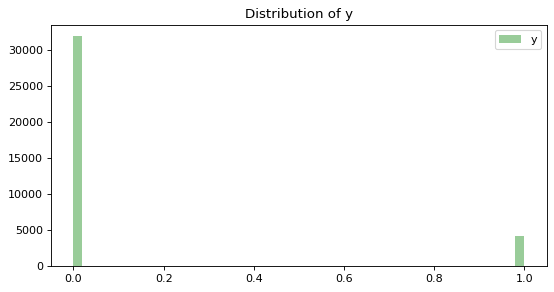

07-21 16:10:16 W hypernets.e.compete.py 1167 - X_train['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'] and X_test['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit'] have different columns before data_clean, try fix it.


## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[Unnamed: 0, age, job, marital, education, def..."
1,selected_features,"[age, job, marital, education, default, balanc..."
2,unselected_features,[Unnamed: 0]
3,X_train.shape,"(36168, 16)"
4,y_train.shape,"(36168,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,"(9043, 16)"
8,unselected_reason,{'Unnamed: 0': 'idness'}
9,kept/dropped feature count,16/1


## Drift Detection

### Initliazed parameters

,key,value
0,min_features,10
1,name,drift_detection
2,num_folds,5
3,remove_shift_variable,True
4,remove_size,0.1
5,threshold,0.7
6,variable_shift_threshold,0.7


### Fitted parameters

,key,value
0,input_features,"[age, job, marital, education, default, balanc..."
1,selected_features,None
2,unselected_features,None
3,history,"[{'auc': 0.5019675689558889, 'n_features': 16,..."
4,scores,"{'job': 0.49300104763233427, 'marital': 0.5129..."


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,max_trials,None
2,name,space_searching
3,num_folds,3
4,size,None
5,time_limit,None


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,30,0.828263,19,0.89104,163.725982,28,30


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,19,0.891040,4.814827,"[0, 0, 1, 1, 175, 2, 2, 3, 2, 2]"
1,21,0.890487,12.500656,"[2, 3, 0, 2, 3, 0]"
2,17,0.875277,2.302754,"[0, 3, 1, 2, 300, 1, 3, 3, 3, 4]"
3,13,0.874723,3.947919,"[2, 2, 0, 2, 0, 4]"
4,12,0.864215,3.914918,"[2, 2, 1, 3, 0, 0, 1]"


#### Best Trial:

key,value
signature,d01fb5ad72433a5dad53a6b9bcfbb886
vectors,"[0, 0, 1, 1, 175, 2, 2, 3, 2, 2]"
0-estimator_options.hp_or,0
1-numeric_imputer_0.strategy,mean
2-numeric_scaler_optional_0.hp_opt,True
3-Module_LightGBMEstimator_1.boosting_type,dart
4-Module_LightGBMEstimator_1.num_leaves,175
5-Module_LightGBMEstimator_1.max_depth,7
6-Module_LightGBMEstimator_1.learning_rate,0.5
7-Module_LightGBMEstimator_1.reg_alpha,1


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.794542,8,0.833029,77.838278,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,8,0.833029,24.723752,"[0, 3, 1, 1, 415, 3, 0, 1, 3, 4]"
1,5,0.829711,1.494108,"[1, 0, 1, 2, 2, 1, 2, 2, 5, 4, 3]"
2,6,0.818403,12.315567,"[2, 1, 1, 0, 1, 4, 1]"
3,1,0.817297,6.486924,"[0, 3, 0, 1, 40, 3, 1, 5, 0]"
4,4,0.802201,2.088541,"[0, 1, 0, 0, 185, 0, 1, 5, 3]"


#### Best Trial:

key,value
signature,d01fb5ad72433a5dad53a6b9bcfbb886
vectors,"[0, 3, 1, 1, 415, 3, 0, 1, 3, 4]"
0-estimator_options.hp_or,0
1-numeric_imputer_0.strategy,most_frequent
2-numeric_scaler_optional_0.hp_opt,True
3-Module_LightGBMEstimator_1.boosting_type,dart
4-Module_LightGBMEstimator_1.num_leaves,415
5-Module_LightGBMEstimator_1.max_depth,10
6-Module_LightGBMEstimator_1.learning_rate,0.001
7-Module_LightGBMEstimator_1.reg_alpha,0.01


### Fitted parameters

,key,value
0,input_features,"[age, job, marital, education, default, balanc..."
1,best_reward,0.878484
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,make_scorer(accuracy_score)


### Fitted parameters

,0,1
0,weights,"[0.4, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,scores,"[0.8784837425348374, 0.8820227825702278, 0.882..."
2,best_stack,"[0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 1, 0, 2, ..."
3,hits,"{0: 8, 1: 8, 2: 4}"
4,ensemble_size,20


0.8729547641963427

In [7]:
experiment = make_experiment(train_data.copy(),test_data=test_data.copy(), target='deposit',
                             random_state=8888,max_trials=10,
                              class_balancing='RandomOverSampling',
                             )
estimator = experiment.run()
y_pred = estimator.predict(X_test)
score = recall_score(y_test,y_pred,pos_label='yes')
score

#  Set class_balancing='RandomUnderSampling'
### _best_reward is 0.8816

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(36168, 17)","(36168,)",None,None,"(9043, 18)",binary(2)


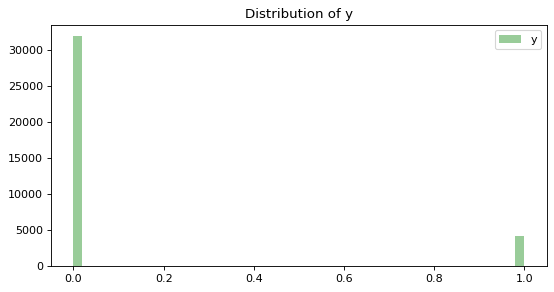

07-21 16:14:37 W hypernets.e.compete.py 1167 - X_train['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'] and X_test['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit'] have different columns before data_clean, try fix it.


## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[Unnamed: 0, age, job, marital, education, def..."
1,selected_features,"[age, job, marital, education, default, balanc..."
2,unselected_features,[Unnamed: 0]
3,X_train.shape,"(36168, 16)"
4,y_train.shape,"(36168,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,"(9043, 16)"
8,unselected_reason,{'Unnamed: 0': 'idness'}
9,kept/dropped feature count,16/1


## Drift Detection

### Initliazed parameters

,key,value
0,min_features,10
1,name,drift_detection
2,num_folds,5
3,remove_shift_variable,True
4,remove_size,0.1
5,threshold,0.7
6,variable_shift_threshold,0.7


### Fitted parameters

,key,value
0,input_features,"[age, job, marital, education, default, balanc..."
1,selected_features,None
2,unselected_features,None
3,history,"[{'auc': 0.5019675689558889, 'n_features': 16,..."
4,scores,"{'job': 0.49300104763233427, 'marital': 0.5129..."


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,max_trials,None
2,name,space_searching
3,num_folds,3
4,size,None
5,time_limit,None


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,21,0.83573,12,0.887721,64.951888,22,30


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,12,0.887721,2.519325,"[0, 3, 1, 0, 200, 2, 3, 2, 4, 0]"
1,18,0.887721,2.503132,"[0, 0, 1, 0, 105, 2, 3, 0, 4, 4]"
2,19,0.882467,2.159029,"[0, 0, 1, 2, 245, 2, 3, 2, 1, 3]"
3,10,0.878319,1.826667,"[1, 1, 0, 2, 3, 1, 1, 1, 3, 4]"
4,20,0.876936,4.079059,"[2, 3, 1, 2, 0, 3, 4]"


#### Best Trial:

key,value
signature,d01fb5ad72433a5dad53a6b9bcfbb886
vectors,"[0, 3, 1, 0, 200, 2, 3, 2, 4, 0]"
0-estimator_options.hp_or,0
1-numeric_imputer_0.strategy,most_frequent
2-numeric_scaler_optional_0.hp_opt,True
3-Module_LightGBMEstimator_1.boosting_type,gbdt
4-Module_LightGBMEstimator_1.num_leaves,200
5-Module_LightGBMEstimator_1.max_depth,7
6-Module_LightGBMEstimator_1.learning_rate,0.1
7-Module_LightGBMEstimator_1.reg_alpha,0.1


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.853628,10,0.853628,86.591591,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,10,0.853628,1.855292,"[1, 1, 0, 1, 2, 0, 4, 1, 4, 3]"
1,8,0.836734,9.884099,"[0, 0, 0, 0, 295, 2, 0, 2, 3]"
2,6,0.826974,17.823587,"[2, 3, 1, 0, 2, 2, 2]"
3,7,0.818873,25.883288,"[0, 3, 0, 1, 455, 1, 1, 3, 4]"
4,9,0.813537,4.961370,"[1, 2, 1, 1, 1, 0, 4, 2, 3, 1, 2]"


#### Best Trial:

key,value
signature,efa0b027dff5f7cb032664969d49ae84
vectors,"[1, 1, 0, 1, 2, 0, 4, 1, 4, 3]"
0-estimator_options.hp_or,1
1-numeric_imputer_0.strategy,median
2-numeric_scaler_optional_0.hp_opt,False
3-Module_XGBoostEstimator_1.max_depth,5
4-Module_XGBoostEstimator_1.learning_rate,0.5
5-Module_XGBoostEstimator_1.booster,gbtree
6-Module_XGBoostEstimator_1.gamma,5
7-Module_XGBoostEstimator_1.min_child_weight,5


### Fitted parameters

,key,value
0,input_features,"[age, job, marital, education, default, balanc..."
1,best_reward,0.878484
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,make_scorer(accuracy_score)


### Fitted parameters

,0,1
0,weights,"[0.4, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,scores,"[0.8784837425348374, 0.8820227825702278, 0.882..."
2,best_stack,"[0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 1, 0, 2, ..."
3,hits,"{0: 8, 1: 8, 2: 4}"
4,ensemble_size,20


0.8816169393647738

In [8]:
experiment = make_experiment(train_data.copy(),test_data=test_data.copy(), target='deposit',
                             random_state=8888,max_trials=10,
                              class_balancing='RandomUnderSampling',
                             )
estimator = experiment.run()
y_pred = estimator.predict(X_test)
score = recall_score(y_test,y_pred,pos_label='yes')
score

#  More choices of class_balancing

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(36168, 17)","(36168,)",None,None,"(9043, 18)",binary(2)


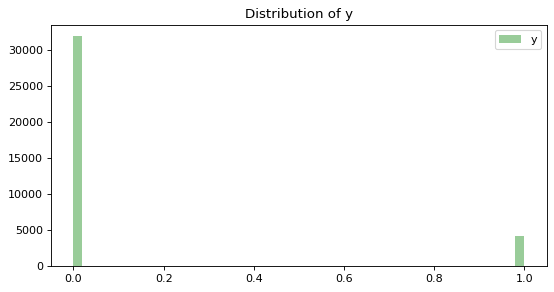

07-21 16:17:27 W hypernets.e.compete.py 1167 - X_train['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'] and X_test['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit'] have different columns before data_clean, try fix it.


## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[Unnamed: 0, age, job, marital, education, def..."
1,selected_features,"[age, job, marital, education, default, balanc..."
2,unselected_features,[Unnamed: 0]
3,X_train.shape,"(36168, 16)"
4,y_train.shape,"(36168,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,"(9043, 16)"
8,unselected_reason,{'Unnamed: 0': 'idness'}
9,kept/dropped feature count,16/1


## Drift Detection

### Initliazed parameters

,key,value
0,min_features,10
1,name,drift_detection
2,num_folds,5
3,remove_shift_variable,True
4,remove_size,0.1
5,threshold,0.7
6,variable_shift_threshold,0.7


### Fitted parameters

,key,value
0,input_features,"[age, job, marital, education, default, balanc..."
1,selected_features,None
2,unselected_features,None
3,history,"[{'auc': 0.5019675689558889, 'n_features': 16,..."
4,scores,"{'job': 0.49300104763233427, 'marital': 0.5129..."


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,max_trials,None
2,name,space_searching
3,num_folds,3
4,size,None
5,time_limit,None


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,16,0.852046,7,0.886338,95.063574,17,30


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,7,0.886338,4.432029,"[2, 3, 0, 2, 0, 2]"
1,13,0.885232,9.303605,"[2, 3, 0, 2, 2, 2]"
2,15,0.878042,1.623202,"[0, 3, 0, 0, 230, 1, 3, 2, 3]"
3,5,0.875000,13.687708,"[2, 1, 0, 2, 3, 1]"
4,17,0.871958,1.264649,"[1, 0, 0, 3, 2, 0, 2, 1, 3, 4]"


#### Best Trial:

key,value
signature,1eda647a850f9867b0cdd8fddfa2c686
vectors,"[2, 3, 0, 2, 0, 2]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,most_frequent
2-numeric_scaler_optional_0.hp_opt,False
3-Module_CatBoostEstimator_1.learning_rate,0.5
4-Module_CatBoostEstimator_1.depth,3
5-Module_CatBoostEstimator_1.l2_leaf_reg,10


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.86618,8,0.878484,120.315085,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,8,0.878484,13.595892,"[1, 0, 1, 2, 3, 0, 2, 1, 1, 4, 4]"
1,9,0.878318,25.329982,"[0, 2, 1, 0, 20, 3, 2, 4, 2, 3]"
2,10,0.866180,14.659831,"[2, 3, 0, 1, 1, 2]"
3,5,0.859876,8.593864,"[0, 3, 0, 0, 80, 2, 1, 4, 0]"
4,7,0.853213,15.009795,"[2, 1, 1, 1, 1, 2, 2]"


#### Best Trial:

key,value
signature,aabad6e27f1e0a7785a3649fc4846852
vectors,"[1, 0, 1, 2, 3, 0, 2, 1, 1, 4, 4]"
0-estimator_options.hp_or,1
1-numeric_imputer_0.strategy,mean
2-numeric_scaler_optional_0.hp_opt,True
3-Module_XGBoostEstimator_1.max_depth,7
4-Module_XGBoostEstimator_1.learning_rate,0.1
5-Module_XGBoostEstimator_1.booster,gbtree
6-Module_XGBoostEstimator_1.gamma,1.5
7-Module_XGBoostEstimator_1.min_child_weight,5


### Fitted parameters

,key,value
0,input_features,"[age, job, marital, education, default, balanc..."
1,best_reward,0.878484
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,make_scorer(accuracy_score)


### Fitted parameters

,0,1
0,weights,"[0.4, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,scores,"[0.8784837425348374, 0.8820227825702278, 0.882..."
2,best_stack,"[0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 1, 0, 2, ..."
3,hits,"{0: 8, 1: 8, 2: 4}"
4,ensemble_size,20


0.766121270452358

In [9]:
#possible values of class_balancing:'SMOTE'↑,'ADASYN'↑,'NearMiss'↓,'TomeksLinks'↓
experiment = make_experiment(train_data.copy(),test_data=test_data.copy(), target='deposit',
                             random_state=8888,max_trials=10,
                             class_balancing='SMOTE',
                             )
estimator = experiment.run()
y_pred = estimator.predict(X_test)
score = recall_score(y_test,y_pred,pos_label='yes')
score